## HANDWRITTEN DIGIT PREDICTION

In [148]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

In [149]:
 data=tf.keras.datasets.mnist

In [150]:
(X_train,y_train),(X_test,y_test)=data.load_data()

In [151]:
print(X_train.shape)

(60000, 28, 28)


In [152]:
X_train=X_train/255
X_test=X_test/255

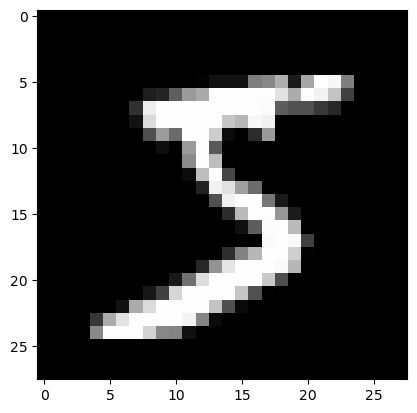

In [86]:
plt.imshow(X_train[0],cmap='gray')
plt.show()

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.regularizers import l2

In [138]:
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(units=25,activation='relu',kernel_regularizer=l2(0.0001)),
    Dense(units=15,activation='relu',kernel_regularizer=l2(0.0001)),
    Dense(units=10,activation='softmax',kernel_regularizer=l2(0.0001))
]) 

In [139]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [140]:
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8854 - loss: 0.4082
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9380 - loss: 0.2305
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9488 - loss: 0.1954
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9551 - loss: 0.1760
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9591 - loss: 0.1620
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9631 - loss: 0.1496
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9652 - loss: 0.1420
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9675 - loss: 0.1344
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9683 - loss: 0.1306
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9697 - loss: 0.1249
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9711 - loss: 0.1215
Epoch 12/20
1875/1875 ━━━━━━━━

In [141]:
loss,accuracy=model.evaluate(X_test,y_test)
print(loss)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9677 - loss: 0.1472    
0.1472475826740265
0.9677000045776367


In [142]:
import cv2

In [158]:
img1=cv2.imread(r"C:\Users\HP\Downloads\digit3.png")
img2=cv2.imread(r"C:\Users\HP\Downloads\digit8.png")
img3=cv2.imread(r"C:\Users\HP\Downloads\digit6.png")
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
img3=cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
img1=np.invert(np.array([img1]))
img2=np.invert(np.array([img2]))
img3=np.invert(np.array([img3]))
img1=img1/255
img2=img2/255
img3=img3/255
img1=img1.reshape(28,28)
img2=img2.reshape(28,28)
img3=img3.reshape(28,28)
print(img1.shape)

(28, 28)


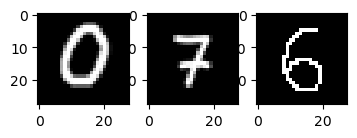

In [159]:
plt.figure(figsize=(4,8))
plt.subplot(1,3,1)
plt.imshow(img1,cmap='grey')
plt.subplot(1,3,2)
plt.imshow(img2,cmap='grey')
plt.subplot(1,3,3)
plt.imshow(img3,cmap='grey')
plt.show()

In [160]:
img1=img1.reshape(1,28,28)

In [161]:
prediction1=model.predict(img1)
prediction2=model.predict(img2.reshape(1,28,28))
prediction3=model.predict(img3.reshape(1,28,28))
print(f"The predicted no. in img1 is {np.argmax(prediction1)}")
print(f"The predicted no. in img2 is {np.argmax(prediction2)}")
print(f"The predicted no. in img3 is {np.argmax(prediction3)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
The predicted no. in img1 is 0
The predicted no. in img2 is 7
The predicted no. in img3 is 6
